# Project 9 - Partial Correlations and Directed Acyclic Graphs

In [1]:
import random
import numpy as np
import pandas as pd

length = 10000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5
# Creates a blank list
lst_dct = {col:[] for col in cols}

In [2]:
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, 0.5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1] + np.random.normal(mu, sigma))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 + np.random.normal(mu, sigma))
    lst_dct["Z"].append(lst_dct["P"][-1] * 2 + 1.5 * lst_dct["X"][-1] 
                        - lst_dct["Y"][-1] * 2 + np.random.normal(mu, sigma))
    
df = pd.DataFrame(lst_dct)
keys = cols
df

,P,Q,X,Y,Z
0,23.620149,55.712378,156.470995,-55.899551,392.510218
1,23.614506,48.129352,149.014543,-45.302268,353.694164
2,24.831288,47.137308,145.601741,-53.459143,380.682122
3,23.513877,50.800332,155.134564,-46.698447,373.629675
4,27.199103,50.594020,147.734267,-54.023922,383.381434
...,...,...,...,...,...
9995,20.278873,44.892669,131.531460,-40.599899,324.759295
9996,24.828872,54.691348,161.215158,-55.622233,398.230901
9997,24.216996,52.074010,153.581369,-63.854170,404.432724
9998,22.742575,48.018448,153.384329,-44.007487,371.549493


<AxesSubplot:xlabel='Q', ylabel='Z'>

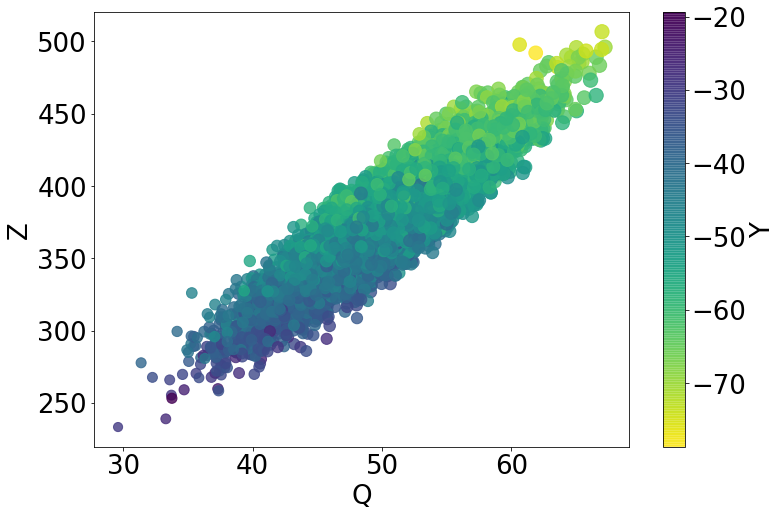

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12, 8))
df.plot.scatter(x = "Q", 
                y = "Z", 
                c = "Y", 
                s = "X", 
                cmap = "viridis_r", 
                alpha = 0.8, 
                ax = ax)

In [4]:
df.corr()

,P,Q,X,Y,Z
P,1.000000,0.001478,0.003431,-0.002904,0.144846
Q,0.001478,1.000000,0.948310,-0.704516,0.912164
X,0.003431,0.948310,1.000000,-0.668485,0.932502
Y,-0.002904,-0.704516,-0.668485,1.000000,-0.846759
Z,0.144846,0.912164,0.932502,-0.846759,1.000000


## Partial Correlation

In [5]:
import statsmodels.api as sm
# Takes keys - y variable
# Creates a residuals dictionary
residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df[X_vars]
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     2471.
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:02:49   Log-Likelihood:                -19791.
No. Observations:               10000   AIC:                         3.959e+04
Df Residuals:                    9995   BIC:                         3.963e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q              0.0022      0.012      0.191      0.8

In [6]:
residuals

,P,Q,X,Y,Z
0,-0.410566,3.409904,-2.791591,-0.471727,-1.122231
1,1.181330,-1.198955,4.954925,-2.477380,-7.648072
2,-1.475833,-1.948625,-1.260649,0.978818,5.546919
3,-0.905854,-0.306788,0.583716,1.061001,0.596033
4,1.283757,0.865590,-0.935795,-0.955469,-0.739839
...,...,...,...,...,...
9995,-3.774588,0.794225,-3.585410,3.110728,5.664580
9996,0.996388,1.111152,1.142956,-1.923090,-4.403640
9997,0.137361,-0.151229,0.186742,-3.186497,-2.200675
9998,-3.140500,-2.351245,-0.780166,4.003637,8.022909


In [7]:
# Takes correlation of the residuals, takes absolute value less than one
# and multiplies these values by one. Fills null values with ones and 
# rounds to two decimals.
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

,P,Q,X,Y,Z
P,1.00,0.00,-0.58,0.63,0.71
Q,0.00,1.00,0.51,-0.14,-0.01
X,-0.58,0.51,1.00,0.74,0.83
Y,0.63,-0.14,0.74,1.00,-0.90
Z,0.71,-0.01,0.83,-0.90,1.00


In [8]:
# !pip install pingouin
# Has a pandas dataframe extension
import pingouin
df.pcorr().round(2)

,P,Q,X,Y,Z
P,1.00,0.00,-0.58,0.63,0.71
Q,0.00,1.00,0.51,-0.14,-0.01
X,-0.58,0.51,1.00,0.74,0.83
Y,0.63,-0.14,0.74,1.00,-0.90
Z,0.71,-0.01,0.83,-0.90,1.00


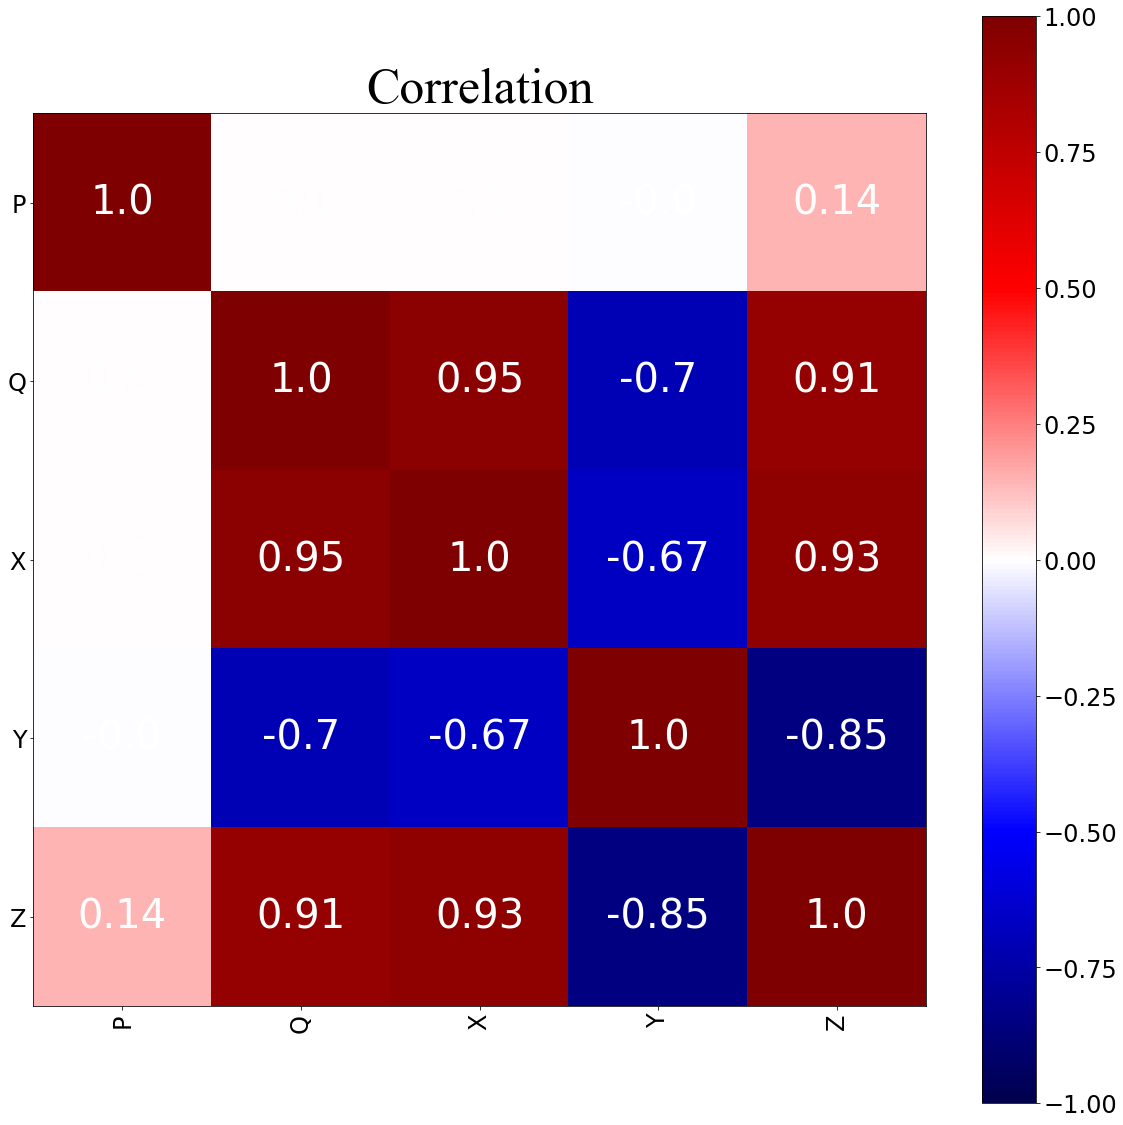

In [9]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(), 
                    save_fig = False, 
                    pp = None)

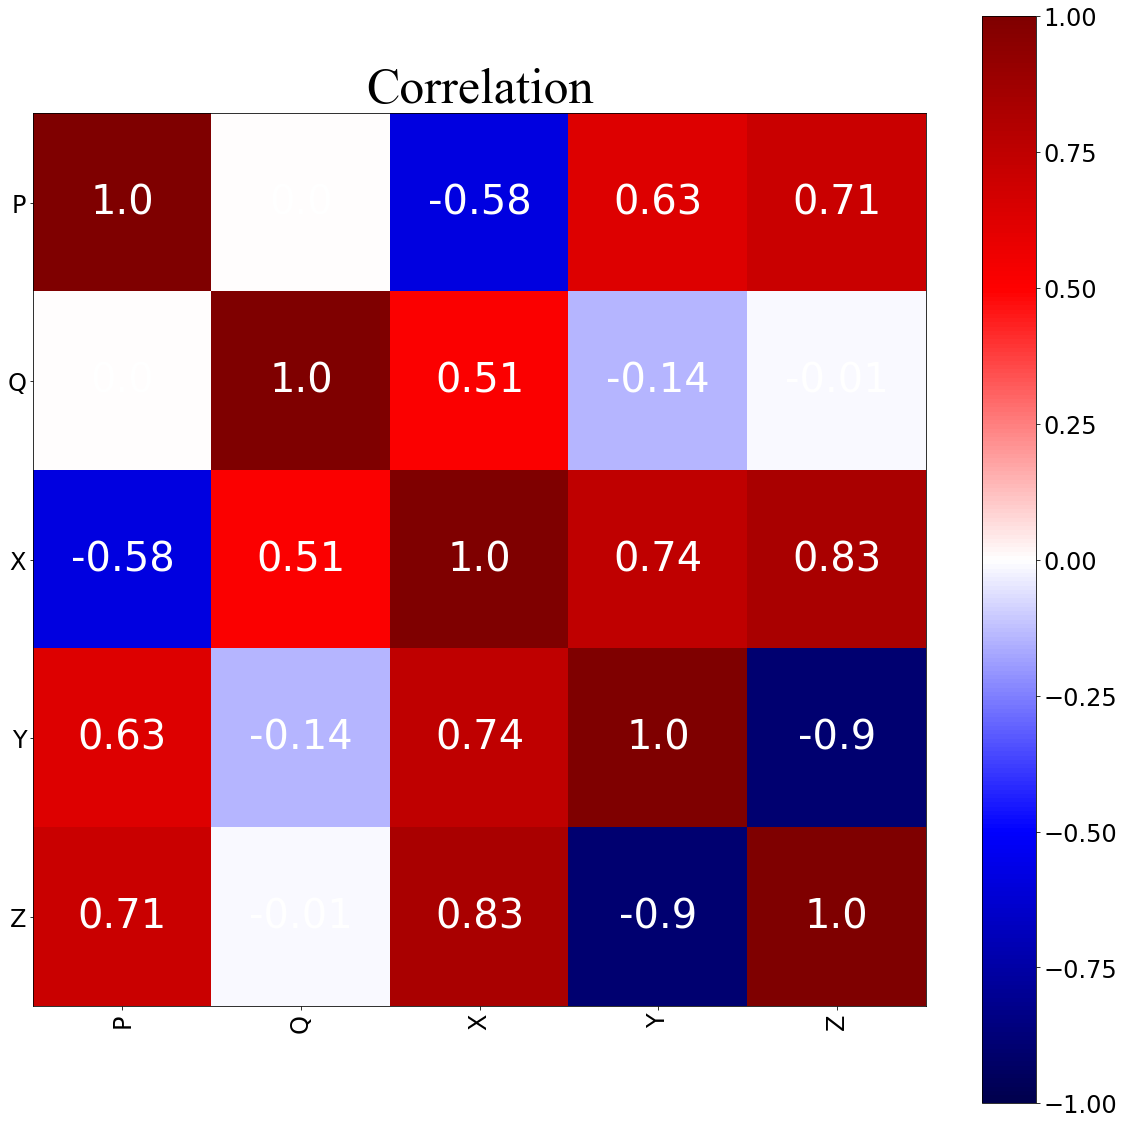

In [10]:
corr_matrix_heatmap(df.pcorr(),
                   save_fig = False,
                   pp = None)

In [11]:
pcorr_pvalues = {}

# y = name, Y = data
for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            # Regress one residual on the other, save the p value for the 
            # explanatory variable. This is the p value of the partial
            # correlation
            results = sm.OLS(Y, X).fit()
            pcorr_pvalues[y][x] = results.pvalues[x]
            print(results.summary())
        else:
            pcorr_pvalues[y][x] = np.NaN
            
pd.DataFrame(pcorr_pvalues).round(2)

                                 OLS Regression Results                                
Dep. Variable:                      P   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                            0.03639
Date:                Tue, 02 Nov 2021   Prob (F-statistic):                       0.849
Time:                        16:02:59   Log-Likelihood:                         -19791.
No. Observations:               10000   AIC:                                  3.958e+04
Df Residuals:                    9999   BIC:                                  3.959e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,P,Q,X,Y,Z
P,NaN,0.85,0.0,0.0,0.00
Q,0.85,NaN,0.0,0.0,0.38
X,0.00,0.00,NaN,0.0,0.00
Y,0.00,0.00,0.0,NaN,0.00
Z,0.00,0.38,0.0,0.0,NaN


## Using Partial Correlations to Build a Causal Skeleton

In [12]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    undirected_graph[x] = [y for y in df.keys() if y != x]
        
undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [13]:
import copy

# Removes the links from P because there are no connections for P besides Z
p_val = 0.01
def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control_vars, 
                                 undirected_graph, 
                                 x, 
                                 y, 
                                 controls_used):
        for c_var in control_vars:
            # Sets c_used every time use cycle through new control
            # Program will iterate through remaining controls
            # Until the statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                print(x, y, controls_used)
                test = df.partial_corr(x = x,
                                       y = y, 
                                       covar = c_used,
                                       method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)
                    # Recursive function that iterates through remaining variables
                    check_remaining_controls(remaining_controls,
                                             undirected_graph,
                                             x,
                                             y,
                                             c_used)
    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
                test = df.partial_corr(x = x,
                                       y = y,
                                       covar = None,
                                       method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars,
                                             undirected_graph,
                                             x, 
                                             y,
                                             [])
    return undirected_graph

build_skeleton(df, undirected_graph)

P Z []
P Z ['Q']
P Z ['Q', 'X']
P Z ['Q']
P Z ['Q', 'Y']
P Z []
P Z ['X']
P Z ['X', 'Q']
P Z ['X']
P Z ['X', 'Y']
P Z []
P Z ['Y']
P Z ['Y', 'Q']
P Z ['Y']
P Z ['Y', 'X']
Q X []
Q X ['P']
Q X ['P', 'Y']
Q X ['P']
Q X ['P', 'Z']
Q X []
Q X ['Y']
Q X ['Y', 'P']
Q X ['Y']
Q X ['Y', 'Z']
Q X []
Q X ['Z']
Q X ['Z', 'P']
Q X ['Z']
Q X ['Z', 'Y']
Q Y []
Q Y ['P']
Q Y ['P', 'X']
Q Y ['P']
Q Y ['P', 'Z']
Q Y []
Q Y ['X']
Q Y ['X', 'P']
Q Y ['X']
Q Y ['X', 'Z']
Q Y []
Q Y ['Z']
Q Y ['Z', 'P']
Q Y ['Z']
Q Y ['Z', 'X']
Q Z []
Q Z ['P']
Q Z ['P', 'X']
X Q []
X Q ['P']
X Q ['P', 'Y']
X Q ['P']
X Q ['P', 'Z']
X Q []
X Q ['Y']
X Q ['Y', 'P']
X Q ['Y']
X Q ['Y', 'Z']
X Q []
X Q ['Z']
X Q ['Z', 'P']
X Q ['Z']
X Q ['Z', 'Y']
X Y []
X Y ['P']
X Z []
X Z ['P']
X Z ['P', 'Q']
X Z ['P']
X Z ['P', 'Y']
X Z []
X Z ['Q']
X Z ['Q', 'P']
X Z ['Q']
X Z ['Q', 'Y']
X Z []
X Z ['Y']
X Z ['Y', 'P']
X Z ['Y']
X Z ['Y', 'Q']
Y Q []
Y Q ['P']
Y Q ['P', 'X']
Y Q ['P']
Y Q ['P', 'Z']
Y Q []
Y Q ['X']
Y Q ['X', 'P']
Y Q ['X

{'P': ['Z'],
 'Q': ['X', 'Y'],
 'X': ['Q', 'Z'],
 'Y': ['Q', 'Z'],
 'Z': ['P', 'X', 'Y']}

## Graphing the Skeleton

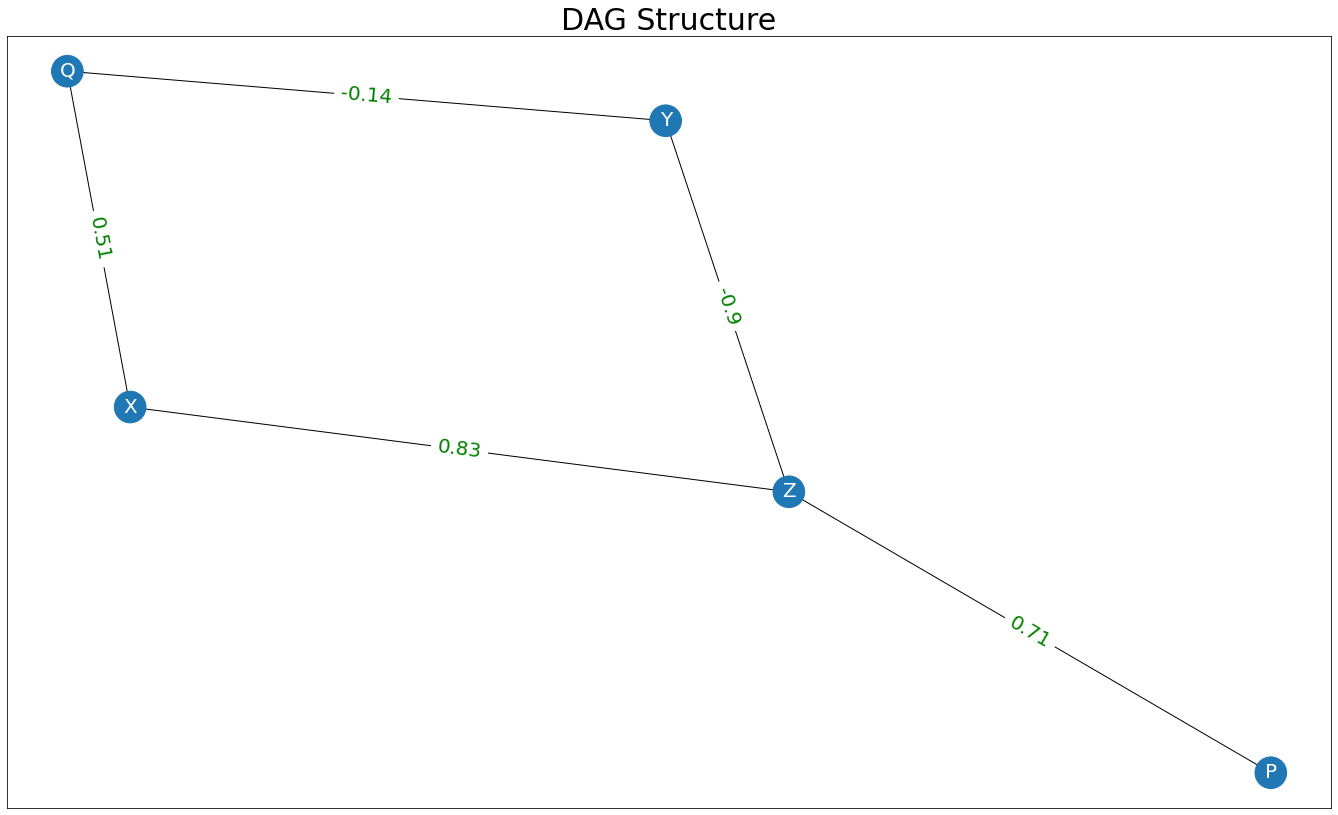

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

def graph_DAG(undirected_graph, 
              df, 
              title = "DAG Structure"):
    pcorr_matrix = df.pcorr()
    graph = nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        # Refers to the first key that there is a correlation with
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key, key2)
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
    
    graph.add_edges_from(edges)
    # Connects every node in the graph to a color
    # Could use different colors but stick to one in this example
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    # Added the nodes for each edge (2 for each)
    graph.nodes()
    # Formatting
    plt.tight_layout()
    # Automatically generates a graph
    pos = nx.spring_layout(graph)
    
    plt.title(title, fontsize = 30)
    # Draws graph and sets orientation
    nx.draw_networkx(graph,
                     pos,
                     node_color = color_map,
                     node_size = 1000,
                     # Shows node labels
                     with_labels = True,
                     arrows = False,
                     font_size = 20,
                     # Transparency
                     alpha = 1,
                     font_color = "white",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,
                                 pos,
                                 edge_labels = edge_labels,
                                 font_color = "green",
                                 font_size = 20)
    plt.show()

graph_DAG(undirected_graph, df)

## Estimating a Directed Acyclic Graph

In [15]:
!pip install pgmpy
from pgmpy.estimators import PC
c = PC(df)
max_cond_vars = len(df.keys()) - 2
# Dag makes sure there is no ambiguity
model = c.estimate(return_type = "dag",
                   # Can use "orig", or "stable" instead of parallel
                   variant = "parallel",
                   significance = p_val,
                   max_cond_vars = max_cond_vars,
                   ci_test = "pearsonr")
edges = model.edges()
edges

  0%|          | 0/3 [00:00<?, ?it/s]

OutEdgeView([('X', 'Z'), ('P', 'Z'), ('Y', 'Z'), ('Q', 'X'), ('Q', 'Y')])

keep control: P
keep control: Y
('X', 'Z') ['P', 'Y']
keep control: X
keep control: Y
('P', 'Z') ['X', 'Y']
keep control: P
keep control: X
('Y', 'Z') ['P', 'X']
('Q', 'X') []
('Q', 'Y') []


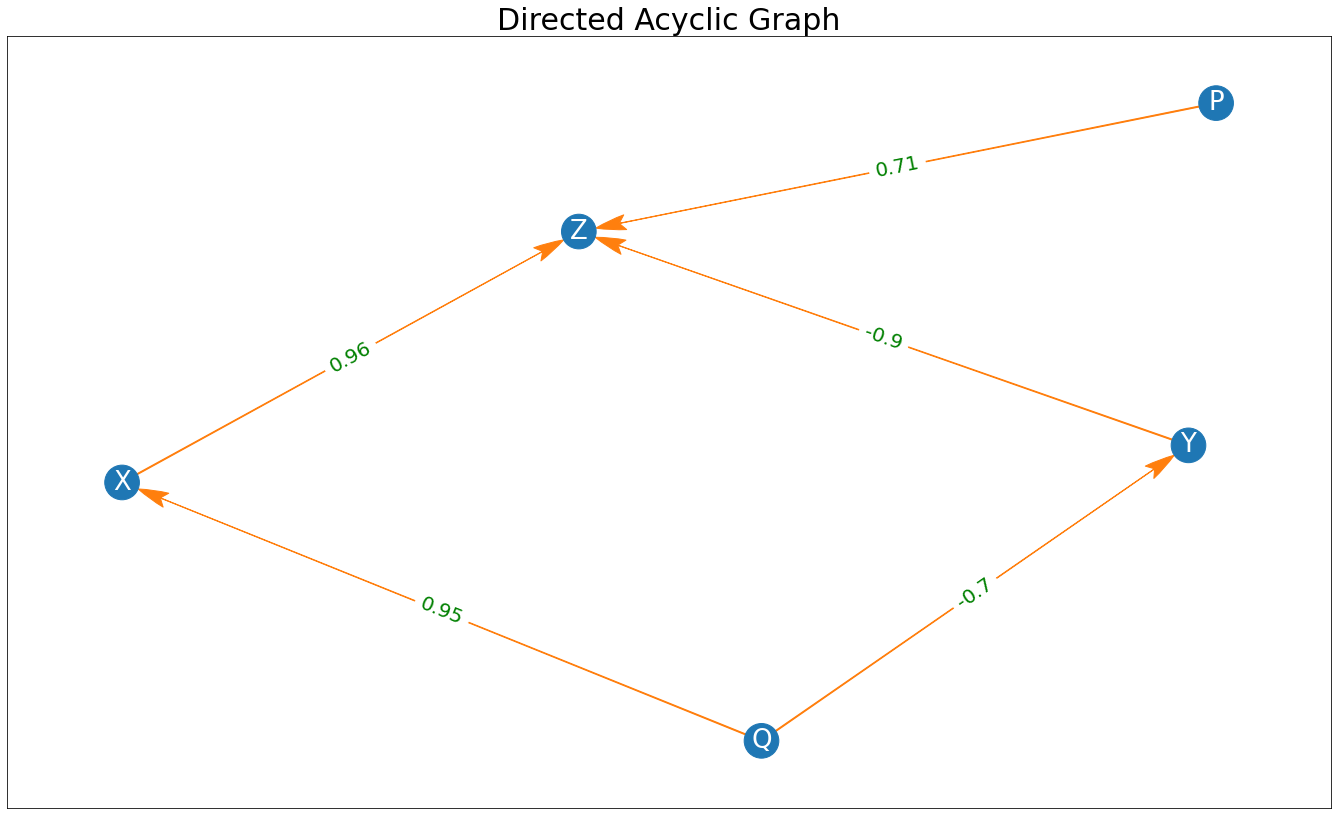

In [17]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges,
              df,
              title = ""):
    graph = nx.DiGraph()
    
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        control = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if(control, edge[1]) in control_edges:
                # Not needed but good to see what program is doing
                print("keep control:", control)
                keep_controls.append(control)
        print(edge, keep_controls)
        # partial correlation matrix built with nodes from the edge and controls
        pcorr = df[[edge[0], edge[1]] + keep_controls].pcorr().round(2)
        edge_labels[edge] = str(pcorr.loc[edge[1], edge[0]])
        
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, 
                     pos, 
                     node_color = color_map, 
                     node_size = 1200,
                     font_color = "white",
                     font_size = 26, 
                     alpha = 1,
                     width = 1, 
                     edge_color = "C1",
                     arrowstyle = ArrowStyle("Fancy, head_length = 3, head_width = 1.5, tail_width = 0.1"))
    nx.draw_networkx_edge_labels(graph,
                                 pos,
                                 edge_labels = edge_labels,
                                 font_color = "green",
                                 font_size = 20)
    
    plt.show()
graph_DAG(edges, df, title = "Directed Acyclic Graph")